<a href="https://colab.research.google.com/github/SRIST1608/Mobile-price-Range-prediction/blob/main/capstone_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

**Data Description**-

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

**Importing all libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import numpy as np


In [2]:
# Connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading dataset

In [8]:
df=pd.read_csv("/content/drive/MyDrive/Mobile price Range prediction-Priyanka Jain/ data_mobile_price_range.csv")
df.shape

(2000, 21)

**Data Inspection**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Checking Null values**

In [12]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no null value present in given dataset

In [13]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
df.shape

(2000, 21)

In [15]:
df.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


**Correlation Heatmap**

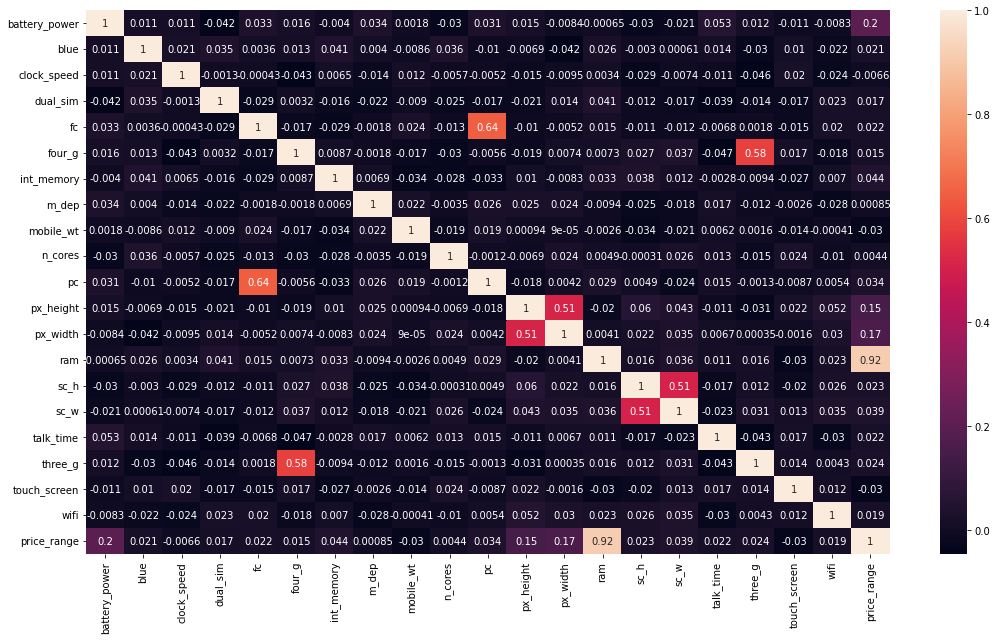

In [16]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There are no two column which are strongly related to each other but we will do some feature engineering to reduce the number of columns

#Feature Engineering

We will calculate screen area(size) to get one column from screen height and screen width.

Using pythagorous theorem to get diagonal size which will be equal to screen size.

In [17]:
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

**Seperating categoricals and continuous variable**

In [18]:
categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi','n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time','screen_size']

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


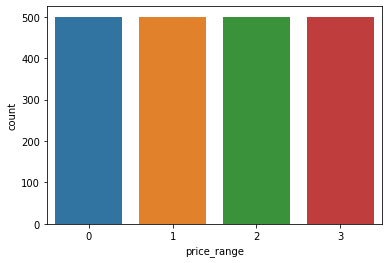

In [19]:
# CountPlot of Target variable(Price range )

sns.countplot(df['price_range'])

**Price range and number of mobile phones**

([<matplotlib.patches.Wedge at 0x7fe6bab7b950>,
 [Text(0.7778174593052024, 0.7778174593052023, 'low'),
  Text(-0.7778174593052023, 0.7778174593052024, 'medium '),
  Text(-0.7778174593052025, -0.7778174593052023, 'high '),
  Text(0.7778174593052022, -0.7778174593052025, 'very high ')],
 [Text(0.4242640687119285, 0.42426406871192845, '25.00%'),
  Text(-0.42426406871192845, 0.4242640687119285, '25.00%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00%'),
  Text(0.4242640687119284, -0.4242640687119286, '25.00%')])

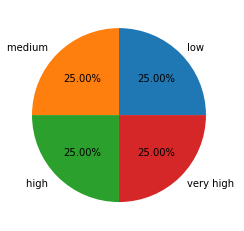

In [20]:
# Pie Plot of Target variable(Price range ) showing percentage of each catogory
count=df['price_range'].value_counts().values
classes = ['low','medium ', 'high ', 'very high ']
plt.pie(count,labels=classes, autopct='%1.2f%%')

Each price range have equal mobiles

**Counting mobiles based on feature**

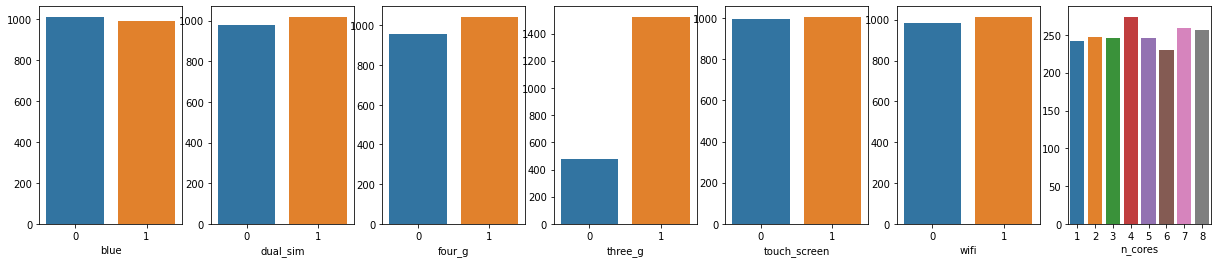

In [21]:
# Plot showing countplot  for  each categorical variable 
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])
    axs[i].set_ylabel('')

**Analysing that the number of phones with all features based on price range(0,1,2,3)**

7


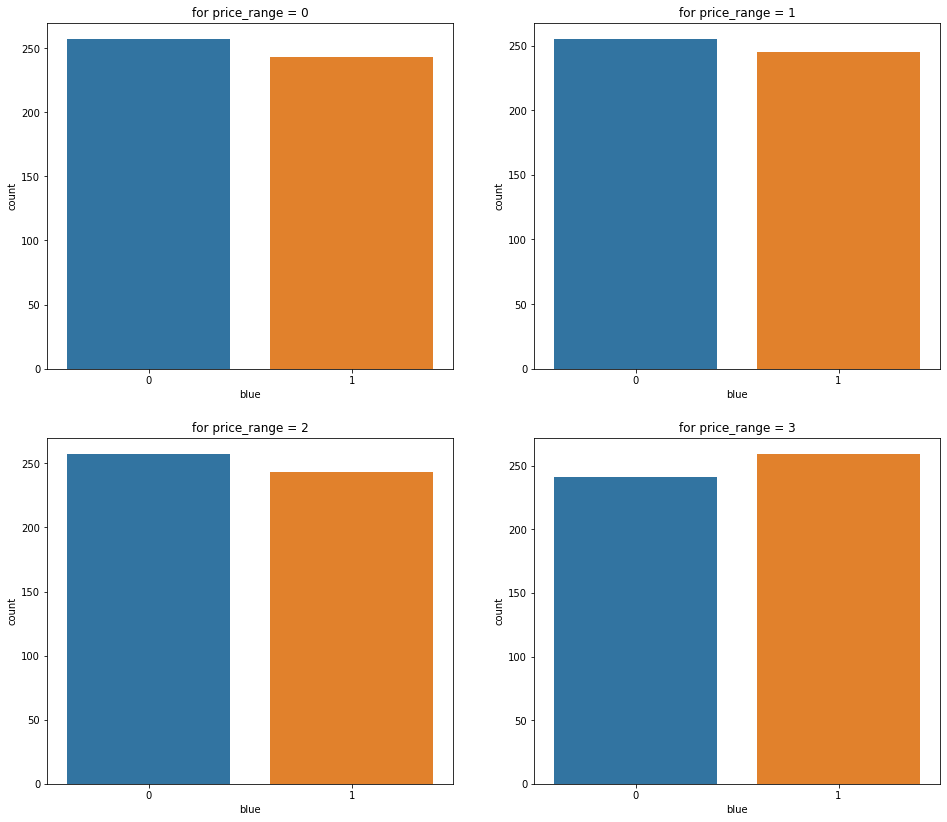

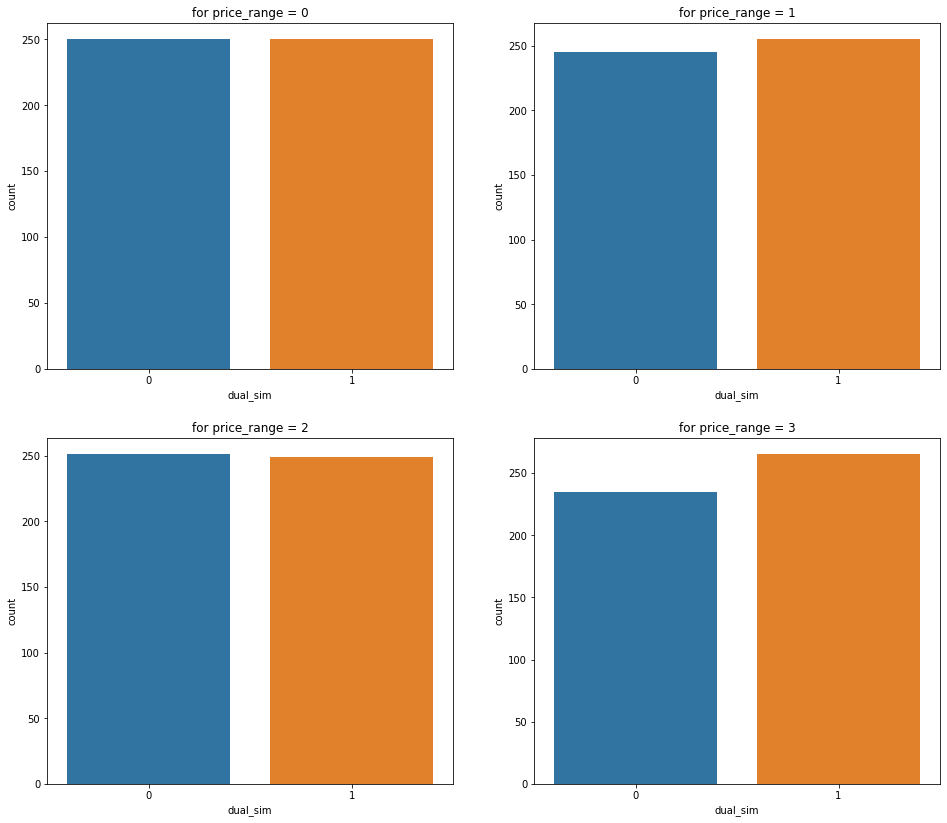

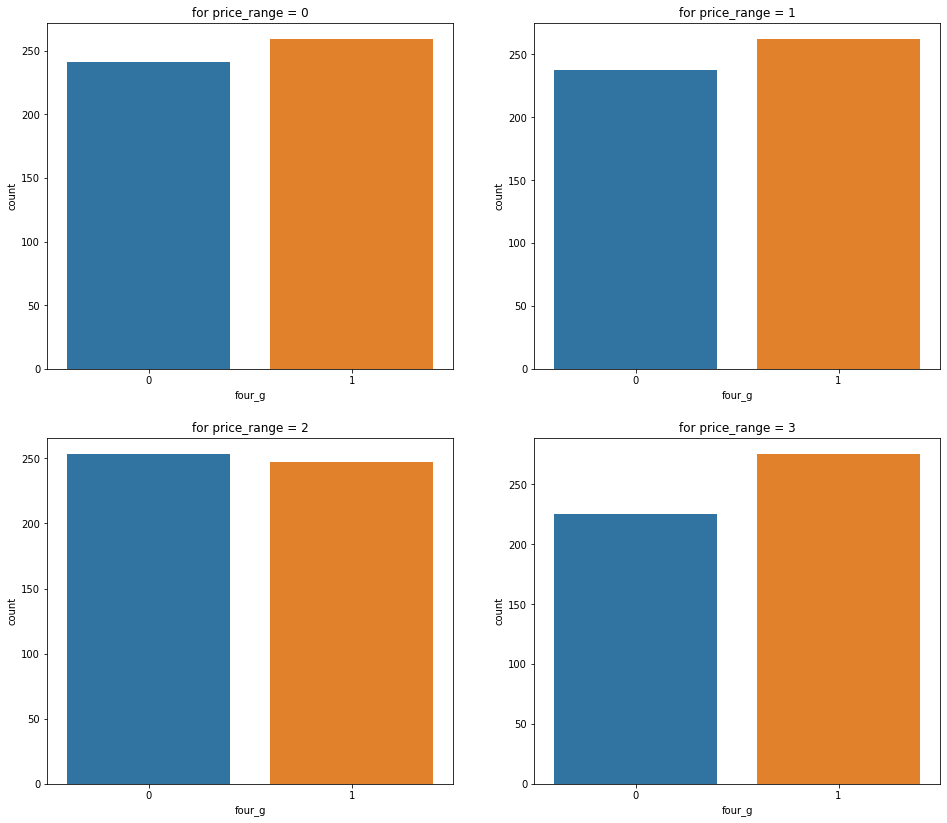

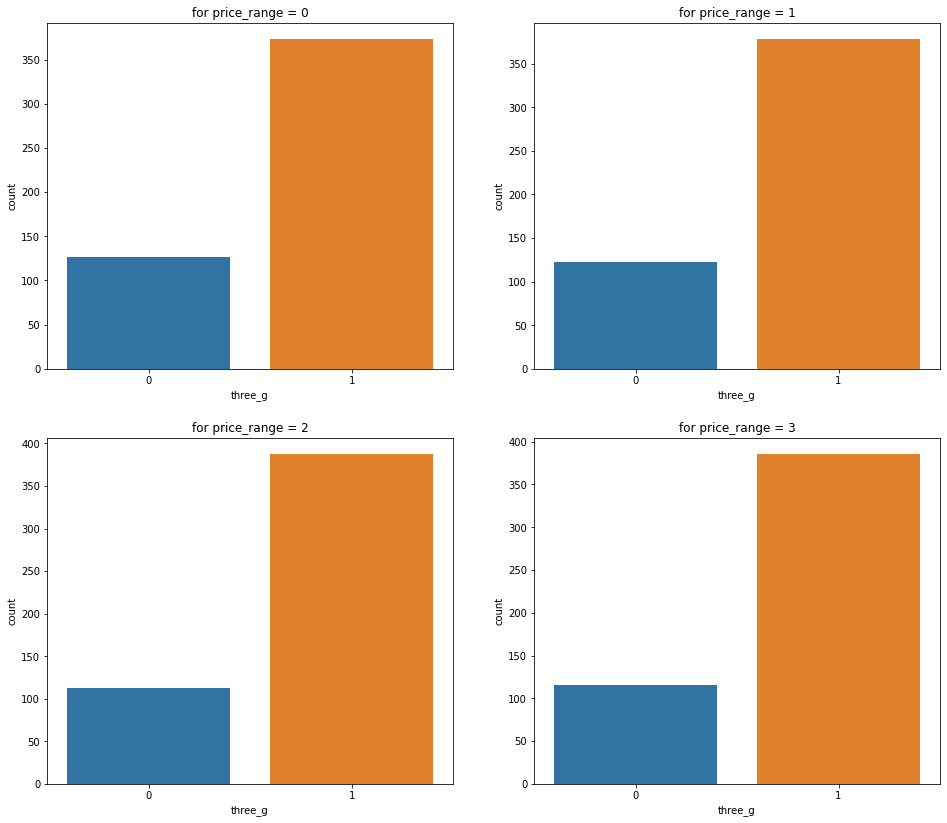

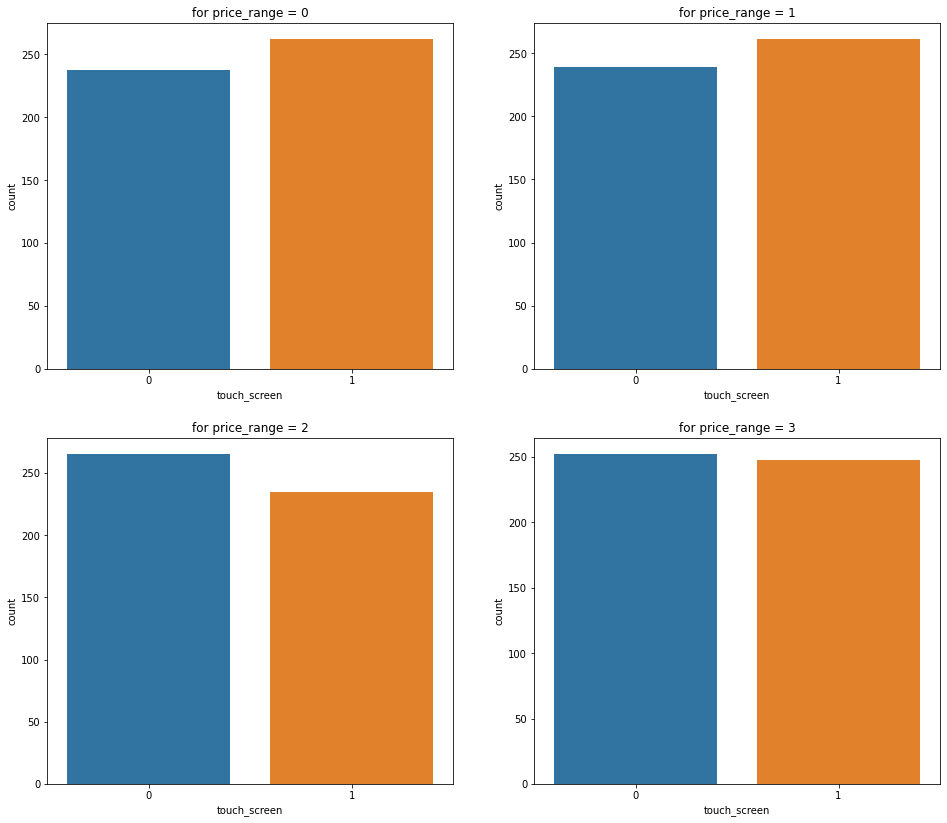

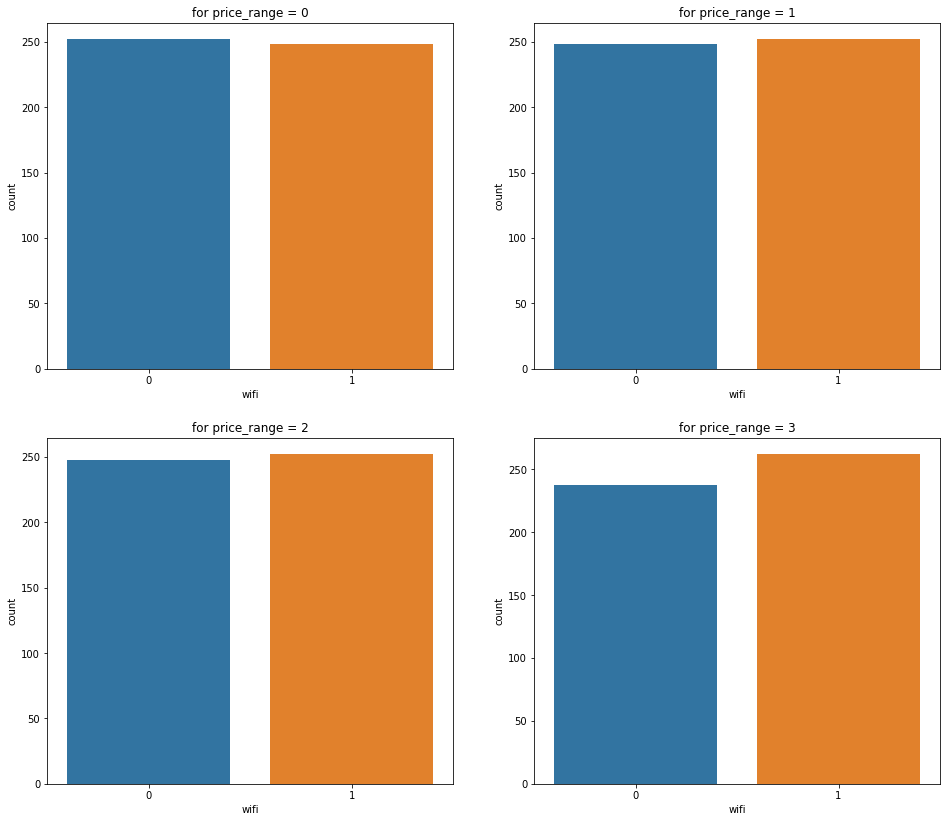

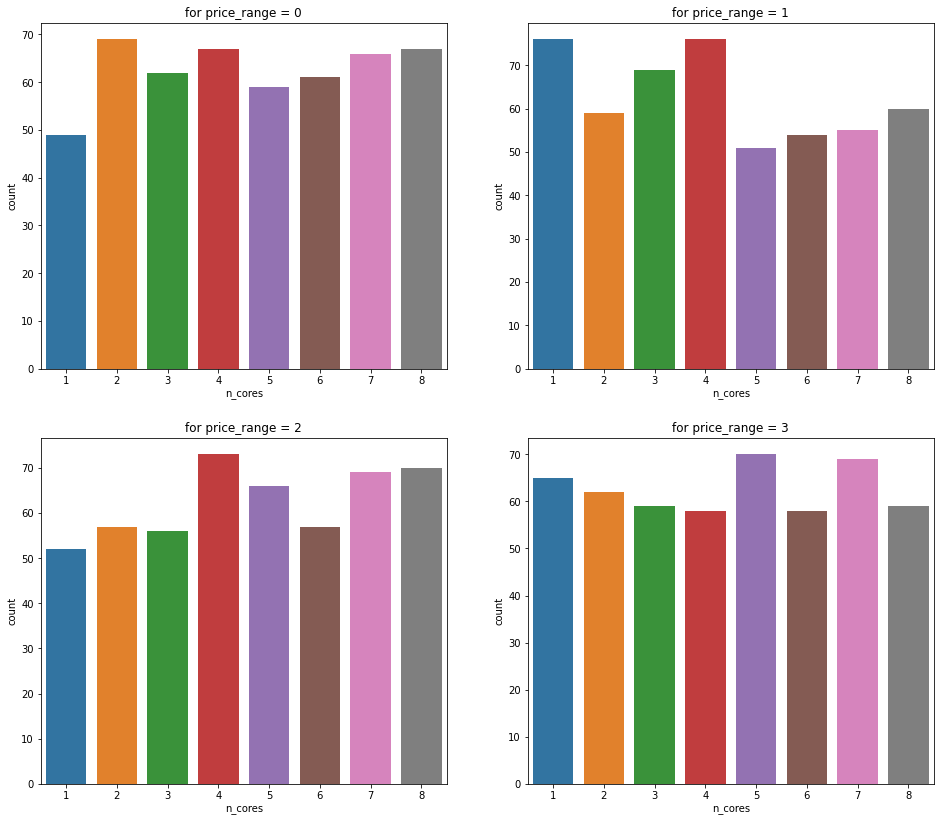

In [22]:
# Countplot of three g sim for each price range
#fig, axs = plt.subplots(2,2, figsize=(16, 14))
length = len(categoricals)
print(length)
for j in range(length):
  fig, axs = plt.subplots(2,2, figsize=(16, 14))
  for i in range(4):
        sns.countplot(x=df[df['price_range']==i][categoricals[j]] , ax=axs[i//2][i%2])
        axs[i//2][i%2].set_xlabel(categoricals[j])
        axs[i//2][i%2].set_title(f'for price_range = {i}')

**Analysis based on price range for different feature**

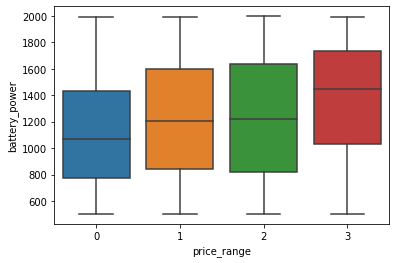

In [23]:
# Boxplot for battery power for each price catogory
sns.boxplot(data=df, x='price_range', y='battery_power', )


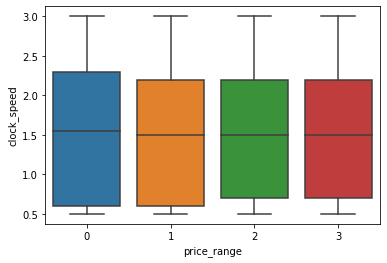

In [24]:
# Boxplot for 'Clock Speed' for each price catogory
sns.boxplot(data=df, x='price_range', y='clock_speed')

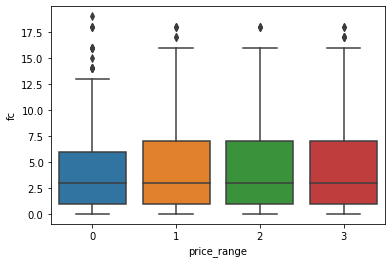

In [25]:
# Boxplot for 'fc' for each price catogory
sns.boxplot(data=df, x='price_range', y='fc')

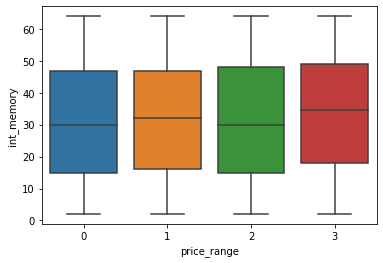

In [26]:
# Boxplot for 'Internal memory' for each price catogory
sns.boxplot(data=df, x='price_range', y='int_memory')

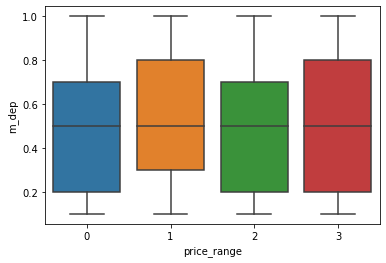

In [27]:
# Boxplot for Mobile Depth for each price catogory
sns.boxplot(data=df, x='price_range', y='m_dep')

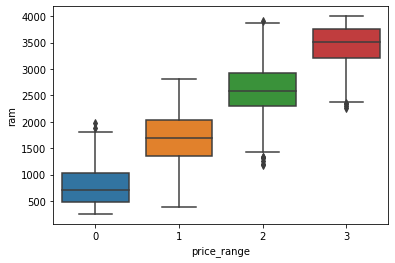

In [28]:
# Boxplot for Mobile Depth for each price catogory
sns.boxplot(data=df, x='price_range', y='ram')

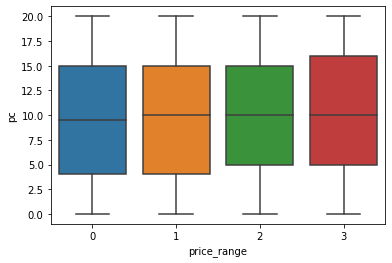

In [29]:
# Boxplot for Mobile Depth for each price catogory
sns.boxplot(data=df, x='price_range', y='pc')

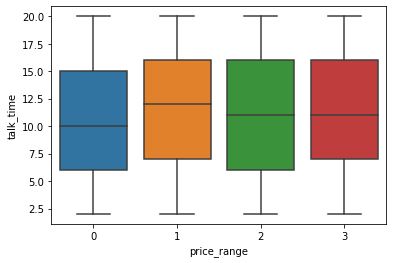

In [30]:
# Boxplot for Mobile Depth for each price catogory
sns.boxplot(data=df, x='price_range', y='talk_time')

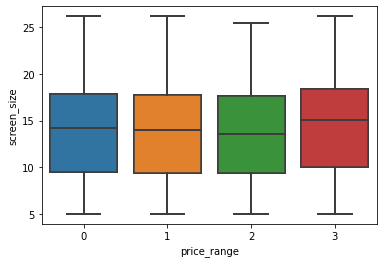

In [31]:
# Boxplot for Mobile Depth for each price catogory
for i in continuous:
  sns.boxplot(data=df, x='price_range', y='screen_size')

#Splitting dependent and Independent variable into test and train dataset

In [32]:
# Input and output variables
y=df['price_range']
x=df.drop('price_range',axis=1)


In [33]:
from sklearn.model_selection import train_test_split
#Splitting the data into test and train dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)
x_train.columns
x_test.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'screen_size'],
      dtype='object')

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

#Implementing Logistic regression ML algorithm for classification

In [35]:
#Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
# Using multiclass logistic regression
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',fit_intercept=True, )
model.fit(x_train, y_train)
train_preds_proba = model.predict_proba(x_train)
test_preds_proba = model.predict_proba(x_test)
# Get the predicted classes
train_class_pred = model.predict(x_train)
test_class_pred = model.predict(x_test)


**Evaluating the performance of the trained model**

In [37]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)



In [38]:
train_accuracy

0.9805882352941176

In [39]:
test_accuracy

0.94

Model coefficient

[[-2.74645338e+00  2.42623999e-02  9.76169671e-02  1.22614092e-01
  -1.12426848e-01  2.41125997e-02 -1.75059561e-01  2.68669775e-02
   3.75840381e-01 -1.76779147e-02 -1.59633121e-03 -1.64786267e+00
  -1.54469051e+00 -1.11349809e+01 -8.57105634e-02 -4.19767905e-02
   4.32442429e-02  1.17580700e-01  8.69392753e-03]
 [-8.93909068e-01 -1.90136007e-02 -6.81587350e-03  6.30968577e-02
  -1.74752939e-02  2.61219788e-02 -7.37434008e-02  9.61995934e-02
   1.38519006e-01 -9.67930271e-02 -4.02814805e-02 -4.62438494e-01
  -5.60743420e-01 -3.53414109e+00 -7.51067873e-02 -4.14815874e-02
   3.46509438e-02  5.44084704e-02 -7.16584045e-02]
 [ 8.89148363e-01 -6.80934993e-03 -4.78844277e-02 -9.51432411e-02
   7.84054941e-02 -8.99720052e-02 -3.76440211e-02 -4.05555790e-02
  -2.28159373e-02  3.49072551e-02 -6.29989325e-03  4.85889737e-01
   4.94799549e-01  3.53403334e+00  3.54494529e-02  7.43898129e-02
  -8.28568983e-02 -5.38894230e-02 -9.50744950e-02]
 [ 2.75121409e+00  1.56055072e-03 -4.29166659e-02 -9.05

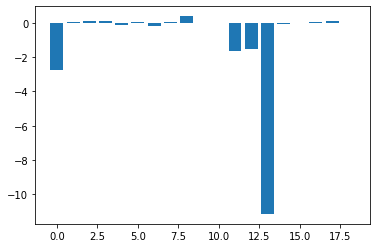

Feature: 0, Score: -0.89391
Feature: 1, Score: -0.01901
Feature: 2, Score: -0.00682
Feature: 3, Score: 0.06310
Feature: 4, Score: -0.01748
Feature: 5, Score: 0.02612
Feature: 6, Score: -0.07374
Feature: 7, Score: 0.09620
Feature: 8, Score: 0.13852
Feature: 9, Score: -0.09679
Feature: 10, Score: -0.04028
Feature: 11, Score: -0.46244
Feature: 12, Score: -0.56074
Feature: 13, Score: -3.53414
Feature: 14, Score: -0.07511
Feature: 15, Score: -0.04148
Feature: 16, Score: 0.03465
Feature: 17, Score: 0.05441
Feature: 18, Score: -0.07166


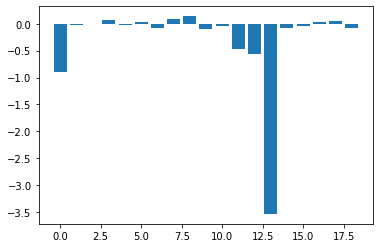

Feature: 0, Score: 0.88915
Feature: 1, Score: -0.00681
Feature: 2, Score: -0.04788
Feature: 3, Score: -0.09514
Feature: 4, Score: 0.07841
Feature: 5, Score: -0.08997
Feature: 6, Score: -0.03764
Feature: 7, Score: -0.04056
Feature: 8, Score: -0.02282
Feature: 9, Score: 0.03491
Feature: 10, Score: -0.00630
Feature: 11, Score: 0.48589
Feature: 12, Score: 0.49480
Feature: 13, Score: 3.53403
Feature: 14, Score: 0.03545
Feature: 15, Score: 0.07439
Feature: 16, Score: -0.08286
Feature: 17, Score: -0.05389
Feature: 18, Score: -0.09507


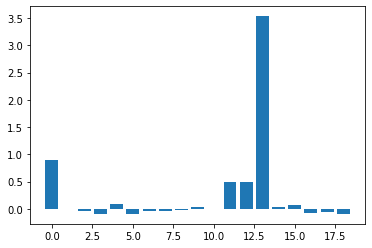

Feature: 0, Score: 2.75121
Feature: 1, Score: 0.00156
Feature: 2, Score: -0.04292
Feature: 3, Score: -0.09057
Feature: 4, Score: 0.05150
Feature: 5, Score: 0.03974
Feature: 6, Score: 0.28645
Feature: 7, Score: -0.08251
Feature: 8, Score: -0.49154
Feature: 9, Score: 0.07956
Feature: 10, Score: 0.04818
Feature: 11, Score: 1.62441
Feature: 12, Score: 1.61063
Feature: 13, Score: 11.13509
Feature: 14, Score: 0.12537
Feature: 15, Score: 0.00907
Feature: 16, Score: 0.00496
Feature: 17, Score: -0.11810
Feature: 18, Score: 0.15804


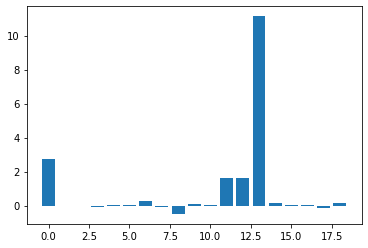

In [40]:
print(model.coef_)
for i in range(0,4):
 importance = model.coef_[i]
 # summarize feature importance
 for i,v in enumerate(importance):
	 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
 plt.bar([x for x in range(len(importance))], importance)
 plt.show()

ROC curve

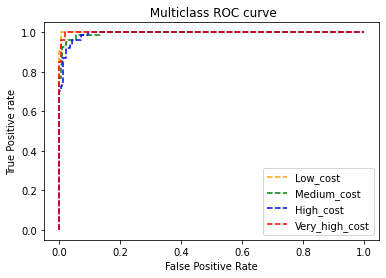

In [41]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

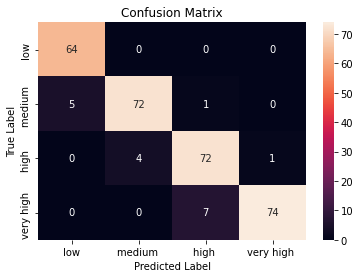

In [42]:

# Confusion Matrix
matrix=confusion_matrix(y_test,test_class_pred)
classes = ['low','medium ', 'high ', 'very high ']
df=pd.DataFrame(data=matrix,index=classes, columns=classes)
sns.heatmap(df,annot=True)
plt.xlabel("Predicted Label")

plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)




In [65]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Implementing LightGBM Classifier model

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
# build the lightgbm model
import lightgbm as lgb
gbm = lgb.LGBMClassifier()
gbm.fit(x_train, y_train)

LGBMClassifier()

In [46]:
train = gbm.predict(x_train)
test = gbm.predict(x_test)

**Accuracy**

In [47]:
accuracy_test_lgb =accuracy_score(test, y_test)

In [48]:
accuracy_train_lgb= accuracy_score(train, y_train)

In [49]:
accuracy_train_lgb

1.0

In [50]:
accuracy_test_lgb

0.8733333333333333

**Confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix')

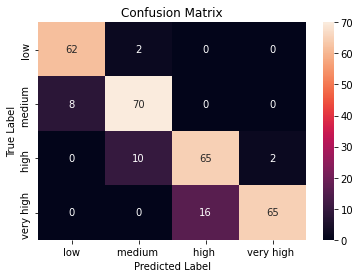

In [51]:

# Confusion Matrix
matrix=confusion_matrix(y_test,test)
classes = ['low','medium ', 'high ', 'very high ']
df=pd.DataFrame(data=matrix,index=classes, columns=classes)
sns.heatmap(df,annot=True)
plt.xlabel("Predicted Label")

plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)

#Implementing Random Forest Classifier model

In [52]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[300,500],
          'max_depth':[10,20,],
          'min_samples_split':[2,6],
          'max_leaf_nodes':[None, 20, 40]
          }

In [53]:
#Using the random forest classifier for the prediction
rf = RandomForestClassifier()
# Using Grid Search
rf = GridSearchCV(rf, params, scoring='accuracy', cv=5)
rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_split': [2, 6],
                         'n_estimators': [300, 500]},
             scoring='accuracy')

Best Estimator

In [54]:
rf.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=300)

**Accuracy**

In [55]:
rf.best_score_


0.8805882352941176

**Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


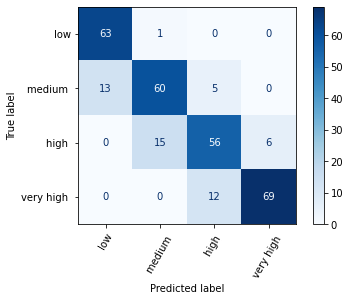

In [56]:
classes = ['low','medium ', 'high ', 'very high ']
plot_confusion_matrix(rf, x_test, y_test, cmap=plt.cm.Blues, display_labels=classes, xticks_rotation='60')
plt.show()

#Implementing Decision tree classification ML Algorithm

In [57]:
# Import Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
pred

array([3, 1, 2, 2, 3, 1, 0, 1, 1, 3, 1, 1, 2, 3, 2, 2, 2, 0, 2, 1, 0, 1,
       1, 0, 3, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 3, 3, 2, 2, 1, 3, 3,
       3, 2, 3, 1, 2, 1, 1, 0, 0, 0, 3, 0, 3, 3, 1, 2, 2, 0, 1, 2, 0, 2,
       2, 2, 1, 2, 2, 3, 0, 1, 0, 1, 3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 2, 2,
       0, 1, 0, 3, 0, 2, 3, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 1, 3, 3, 0,
       2, 2, 0, 0, 3, 1, 0, 2, 0, 0, 2, 2, 3, 0, 0, 0, 2, 1, 1, 3, 2, 2,
       0, 1, 1, 1, 2, 2, 1, 3, 1, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 1, 2, 1,
       1, 2, 3, 1, 1, 1, 3, 3, 0, 3, 3, 3, 3, 0, 2, 0, 2, 3, 0, 1, 0, 2,
       3, 1, 1, 3, 2, 2, 1, 0, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1,
       2, 0, 1, 2, 3, 3, 1, 2, 2, 1, 3, 0, 1, 0, 3, 0, 2, 3, 2, 0, 1, 3,
       1, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1, 0,
       2, 3, 0, 2, 3, 2, 0, 3, 3, 2, 1, 0, 0, 1, 3, 1, 3, 0, 3, 1, 2, 3,
       3, 1, 2, 3, 0, 3, 0, 2, 3, 0, 3, 1, 2, 3, 1, 2, 2, 3, 3, 0, 1, 0,
       2, 3, 1, 0, 2, 0, 2, 0, 1, 2, 2, 0, 1, 3])

**Accuracy**

In [58]:
accuracydt=accuracy_score(y_test,pred)
print(accuracydt)


0.78


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

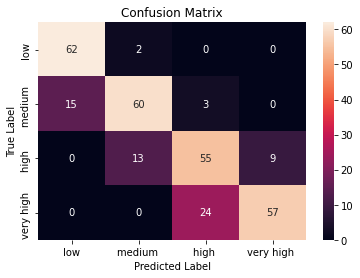

In [59]:
# Confusion Matrix
matrix=confusion_matrix(y_test,pred)
classes = ['low','medium ', 'high ', 'very high ']
df=pd.DataFrame(data=matrix,index=classes, columns=classes)
sns.heatmap(df,annot=True)
plt.xlabel("Predicted Label")

plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)

**Interpretation or Justification of features**

In [60]:
from numpy.lib import shape_base
import shap
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(dt)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(x_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test.iloc[0]) 
shap_values

[array([-2.22152409e-02,  0.00000000e+00,  3.01956029e-03,  0.00000000e+00,
         1.75927901e-03,  0.00000000e+00,  1.55250858e-03,  2.69607843e-03,
        -6.67797033e-04, -2.05062506e-04, -2.31564815e-03, -1.16262511e-02,
         2.19820107e-03, -2.36074239e-01,  3.83420790e-03,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.57381471e-03]),
 array([-0.01153422,  0.        , -0.00153884,  0.        , -0.00086765,
         0.        , -0.00146801, -0.00269608,  0.0005997 ,  0.00211381,
         0.00305094, -0.00251439, -0.01406833, -0.21239756, -0.00343107,
        -0.00210531,  0.        ,  0.        , -0.00137828]),
 array([ 5.79189639e-02,  0.00000000e+00, -1.35688548e-03,  0.00000000e+00,
        -8.91626921e-04,  0.00000000e+00, -6.79517410e-04,  0.00000000e+00,
         7.02810887e-04, -9.52229052e-02, -3.59236252e-03, -3.06700857e-01,
        -2.32435291e-01,  3.24911684e-01,  5.85430755e-03,  2.10531416e-03,
         0.00000000e+00,  4.06072106e-04,  1.56763

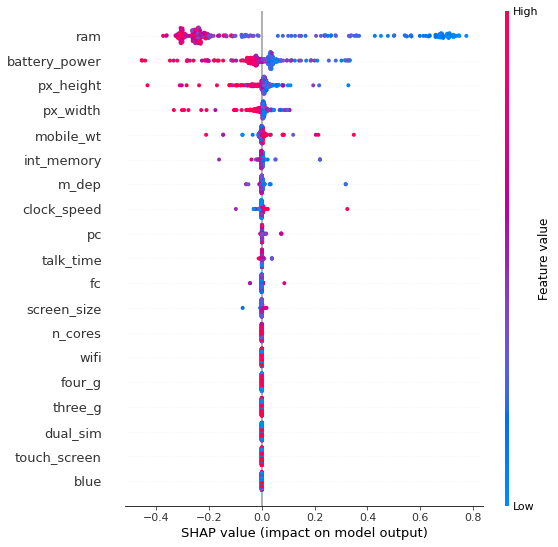

In [61]:
# Obtain a Scatter Summary Plot 
shap_values = shap.TreeExplainer(dt).shap_values(x_test)
shap.summary_plot(shap_values[0], x_test)
